# Chapter 16: Instrumental Variable Estimation

So far the methods described relied on the key untestable assumption of "all variables needed to adjust for confounding and selection bias have been identified and correctly measured".

Instrumental variable estimation is one method that can validly estimate causal effects under an alternative set of assumptions that do not require measuring all adjustment factors.

## 16.1 The 3 Instrumental Conditions

Suppose we have the following DAG

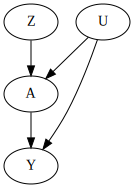

In [5]:
# @title Figure 16.1
import graphviz as gv
# create a directed acyclic graph (DAG)
G = gv.Digraph('G', format='pdf')
# add nodes
G.node('Z', 'Z')
G.node('A', 'A')
G.node('Y', 'Y')
G.node('U', 'U')
# add edges
G.edge('Z', 'A')
G.edge('A', 'Y')
G.edge('U', 'A',constraint='False')
G.edge('U', 'Y',constraint='False')
# render the graph
G.render('my_graph')
G

Typically, we would control for confounding by controlling for $U$. However, $U$ is unobserved.

Instrumental variables on the other hand rely on $Z$ to compute the average causal effect of $A$ on $Y$.

A variable $Z$ is an strument because it meets 3 instrumental conditions:
- (i.) $Z$ is associated with $A$
- (ii.) $Z$ does not affect $Y$ except through its potential effect on $A$
- (iii.) $Z$ and $Y$ do not share causes

Now for an optional segment, we will look at the *formal* definition of the instrumental conditions:

**Technical Point 16.1**:
- (i.) *relevance* condition: non-null association between $Z$ and $A$, or $Z\perp A$ does not hold. Of-course, this is expected to hold in randomized experiments because treatment assignment will influence treatment received.
- (ii.) *exclusion restriction*: condition of "no direct effect of $Z$ on $Y$. At the individual level, this condition is $Y_i^{z,a}=Y_i^{z',a}=Y_i^a$ for all $z,z'$, all $a$, all individuals $i$. This means that when controlling for $a$, $Y$ does not change regardless of the value of $z$.
- (iii.) *marginal exchangeability*: $Y^{a,z}\perp Z$ for all $a,z$

Combining (ii) and (iii) at the individual level implies $Y^a\perp Z$.

Returning to the regular text,

when $Z$ affects $A$ directly, it is known as a *causal* instrument, but there is no requirement for it to be such.

Unfortunately, we cannot prove that variable $Z$ is an instrument. Only condition (i) is empirically verifiable.

The most difficult part of instrumental variable estimation is justifying that some variable $Z$ is an instrument. The commonly used categories of candidate instruments are:
- Genetic factors
- Preference
- Access

Now, let's provisionally assume that $Z$ is an instrument. Then can we consistently estimate the causal effect of $A$ on $Y$ without measuring confounders? The answer is sadly no without further assumptions. An instrument by itself does not allow the identification of an average causal effect, but only identifies certain upper and lower bounds. Typically, the bounds are very wide and often include the null value.

## 16.2 The usual IV estimand

When a dichotomous variable $Z$ is an instrument, (and an additional condition (iv.) described next section) holds, then the average causal effect of treatment on the additive scale
is identified and equals:
$$E[Y^{a=1}]-E[Y^{a=0}]=\frac{E[Y|Z=1]-E[Y|Z=0]}{E[A|Z=1]-E[A|Z=0]}$$

known as the *usual IV estimand* for a dichotomous treatment.

This is calculated simply by calculating the 4 sample average terms.

Equivalently, we could also fit 2 (saturated) linear models to estimate the differences in the denominator and numerator. ($E[A|Z]=\alpha_0+\alpha_1Z, E[Y|Z]=\beta_0+\beta_1Z$)

An alternative method to calculate this standard IV estimator is the *two-stage-least squares estimator*.

How it works is the following:
1. First, fit the first-stage treatment model $E[A|Z]=\alpha_0+\alpha_1Z$ and generate the predicted values $\hat E[A|Z]$ for each individual.
2. Second, fit the second-stage outcome model $E[Y|Z]=\beta_0+\beta_1\hat E[A|Z]$.

The parameter estimate $\hat\beta_1$ will always be numerically equivalent to the standard IV estimate.

Note that the stronger the $Z-A$ association, the better the estimation. Also when the association is weak, there is more uncertainty in the first-stage model which means an overall larger confidence interval.

A commonly used rule of thumb is to declare an instrument as weak if the $F$-statistic from the first-stage model is less than 10.

## 16.3 A fourth identifying condition: homogeneity

The fourth condition is (iv.) *effect homogeneity*. Most early variations of effect homogeneity is unconvincing, practically speaking.

For instance, the earliest version of homogeneity was that there is constant effect of treatment $A$ on outcome $Y$ across individuals.

Less extreme versions of this is still unconvincing. Next section we discuss an alternative condition (iv) that does not require effect homogeneity.

## 16.4 An alternative fourth condition: monotonicity

In a dichotomous $A$ and $Z$, notice how there's 4 different combinations, which is referred to as *compliance types*. For example, users that are $A=1$ regardless of the value of $Z$ are *always-takers*. There are also *never-takers*, *compliers*, and *defiers*, all following an intuitive meaning.

When no defiers exist, we say that there is monotonicity because the instrument $Z$ either does not change treatment $A$ or increases the value of treatment $A$.

While homogeneity is often implausible, monotonicity appeared credible in many settings. IV methods under monotonicity cannot identify the average causal effect in the population, only in the subpopulation of compliers, but that seemed a price worth paying in order to keep powerful IV methods in our toolbox.

However, the estimation of the average causal effect of treatment in the compliers under monotonicity has been criticized on several grounds.

## 16.5 The three instrumental conditions revisited

Practically speaking, the proposed instrument $Z$ will fail to be a valid one if it violates either (ii) or (iii) and will be a weak isntrument if it only barely meets condition (i). In all these cases, the use of IV estimation may result in substantial bias even if condition (iv) held perfectly.

There are 3 serious problems when the proposed instrument is weak.
1. weak instruments yield estimates with wide 95% confidence intervals
2. weak instruments amplify bias due to violations of conditions (ii) and (iii).
3. even with a valid instrument and a large sample size, weak instruments introduce bias in the standard IV estimator.

There are techniques in which researchers will try to use simultaneously multiple proposed instruments in an attempt to alleviate the weakness of a single proposed instrument. Unfortunately, the larger the number of proposed instruments, the more likely that some of them will violate one of the instrumental conditions.



## 16.6 Instrumental variable estimation versus other methods

The ideal setting for the applicability of standard IV estimation is more restrictive than that for other methods. Standard IV estimation is better reserved for settings with lots of unmeasured confounding, a truly dichotomous and time-fixed treatment $A$, and a strong (and causal) proposed instrument $Z$, and in which either effect homogeneity or - if one is genuinely interested in the effect in the compliers, monotonicity is expected to hold. A consequence of these restrictions is that IV estimation is generally used to answer relatively causal questions about point interventions (e.g., cross-sectional data).